# Homework 3

## Problem 1

Note: Unfortunately I did not have time to create my own code:( , so I used the code shown in class and added a termination criterion

### (1)

The formulated least square problem is:

min(with respect to A_12 and A_21)
$$ sum(P(x_i, -A) - P)^2 $$
sum from i=1 to i=11


### (2)

Solution using gradient descent:

In [32]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display
import math

X1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = np.flip(X1, axis=1).copy()
a = np.array(([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
T = 20
pwat = 10**(a[0, 0]- a[0,1] / (T + a[0,2]))
pdio = 10**(a[1, 0]- a[1,1] / (T + a[1,2]))
P = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = torch.tensor(P, requires_grad=False, dtype=torch.float32)

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True) #includes initial guess

x1 = torch.tensor(X1, requires_grad=False, dtype=torch.float32)
x2 = torch.tensor(X2, requires_grad=False, dtype=torch.float32)

#simple gradient descent
a = 0.0001

#for i in range(100):
#fixed number of iterations, need to add termination criteria
while g_length > 0.0001:
    P_pred = x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2 )) ** 2) * pwat + \
        x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2 )) ** 2) * pdio
    
    loss = (P_pred - P) ** 2
    loss = loss.sum() 
    
    
    loss.backward()
    
    A_gradient = A.grad
    g_length = math.sqrt((A_gradient[0])**2 + (A_gradient[1])**2)
    
    with torch.no_grad():
        A -= a * A.grad #A = A -  a * A.grad
        
        A.grad.zero_() #to not keep current gradient
        
        
print('estimation A12 and A21 is:' , A)
print('final loss is:', loss.data.numpy())



KeyboardInterrupt: 

### (3)

The model does fit the data fairly well, almost exactly,  as shown by comparing the values below and in the graph below:

In [19]:
print('pressure values are',P)
print('predicted pressure values are', P_pred)
print('x1 values are', x1)

pressure values are [28.1 34.4 36.7 36.9 36.8 36.7 36.5 35.4 32.9 27.7 17.5]
predicted pressure values are [28.824099 34.43768  36.299618 36.75978  36.77656  36.656925 36.334206
 35.42299  33.1277   27.99946  17.473251]
x1 values are [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


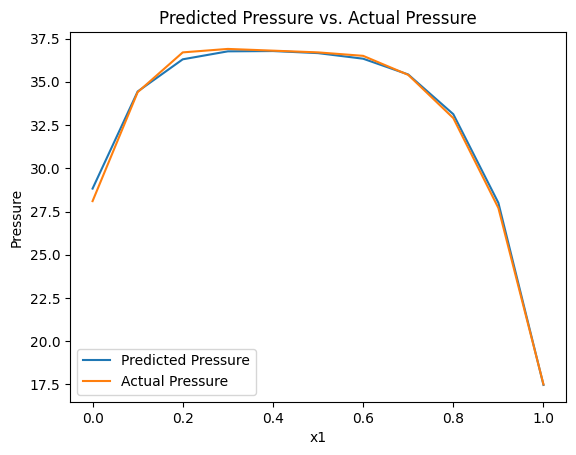

In [16]:
import matplotlib.pyplot as plt
P_pred = P_pred.detach().numpy()[0]
P = P.detach().numpy()[0]
x1 = x1.detach().numpy()[0]

plt.plot(x1, P_pred, label = 'Predicted Pressure')
plt.plot(x1, P, label = 'Actual Pressure')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Predicted Pressure vs. Actual Pressure')
plt.show()

## Problem 2